# Ideal Florida Location for a Gourmet Mexican Restaurant

Installing necessary packages.

In [1]:
!pip install beautifulsoup4
!pip install requests

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 106 kB 3.5 MB/s eta 0:00:01
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [2]:
pip install uszipcode

     |████████████████████████████████| 378 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 61.9 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 11.0 MB/s eta 0:00:01
  Created wheel for autopep8: filename=autopep8-1.5-py2.py3-none-any.whl size=43267 sha256=abc2f7e4444f018f5f2d366449f763b58bef3a86a1411c13f327bb45006e6a72
  Stored in directory: /home/jovyan/.cache/pip/wheels/53/57/44/e97222b8ba3b3cbd97fb67922f57a8945eeb810c6c99806c59
Successfully built autopep8
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import json
from pandas.io.json import json_normalize
from uszipcode import SearchEngine, SimpleZipcode, Zipcode

Parsing of website and scraping the table.

In [4]:
url = "https://sciencetrends.com/map-of-florida-east-coast-beaches-and-cities/"
page = requests.get(url)
print(page.status_code)
soup = BeautifulSoup(page.content, 'html.parser')
tb = soup.find('tbody')

200


From the parsed table, creating a list of just the cities in the northeast and east central regions of Florida.

In [5]:
table_rows = tb.find_all('tr')
#print(table_rows)
CityList=[]
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    if row[0]!='East Coast Florida Beaches' and\
    row[1]!='Southeastern Coast of Florida':
        row[0]=row[0][:-8]
        CityList.append(row[0]) 

Creating variable for the search engine.

In [6]:
search = SearchEngine()

Using the uszipcode package to create a list of the zipcodes for each city and retrieving zipcode location, bounding coordinates of each zipcode, population, population density, median income, and median home value for each zipcode returned.

In [7]:
list5=[]
for i in range(len(CityList)): 
    res=search.by_city_and_state(CityList[i], "FL",returns=None)
    cityName=CityList[i]
    a=0
    for i in res:
        zipcode=res[a].zipcode
        Latitude=res[a].lat
        Longitude=res[a].lng
        S_bound=res[a].bounds_south
        W_bound=res[a].bounds_west
        N_bound=res[a].bounds_north
        E_bound=res[a].bounds_east
        pop=res[a].population
        pop_dense=res[a].population_density
        med_income=res[a].median_household_income
        med_home_value=res[a].median_home_value
        list2=[cityName,zipcode,Latitude,Longitude,S_bound,\
               W_bound,N_bound,E_bound,pop,pop_dense,\
               med_income, med_home_value]
        list5.append(list2)
        a=a+1

Casting our list to a pandas data frame.

In [8]:
df=pd.DataFrame(list5,columns=['City','Zipcode','Latitude','Longitude',\
                               'South Boundry','West Boundry',\
                               'North Boundry','East Boundry','Population',\
                               'Population Density','Median Income',\
                               'Median Home Value'])
df.head()

,City,Zipcode,Latitude,Longitude,South Boundry,West Boundry,North Boundry,East Boundry,Population,Population Density,Median Income,Median Home Value
0,Atlantic Beach,32233,30.36,-81.42,30.323343,-81.459709,30.399843,-81.390331,23673.0,2323.0,50338.0,211100.0
1,Fernandina Beach,32034,30.60,-81.50,30.506896,-81.574418,30.711258,-81.422796,31008.0,547.0,62932.0,254400.0
2,Flagler Beach,32136,29.47,-81.14,29.401590,-81.192068,29.555170,-81.094828,7080.0,375.0,48767.0,208100.0
3,Jacksonville Beach,32250,30.28,-81.42,30.252243,-81.453815,30.307704,-81.376317,25356.0,2944.0,56466.0,247000.0
4,Neptune Beach,32266,30.32,-81.41,30.306941,-81.438570,30.324647,-81.387568,7037.0,3018.0,67045.0,315300.0


Now dropping the Palm Coast zip code 32143, because it returned no population, location, or demographic data. Also, dropping the city name "Vilano Beach," because it returns a zip code on the west coast of Florida.

In [9]:
df=df.drop([6,14]).reset_index(drop=True)
df.head()

,City,Zipcode,Latitude,Longitude,South Boundry,West Boundry,North Boundry,East Boundry,Population,Population Density,Median Income,Median Home Value
0,Atlantic Beach,32233,30.36,-81.42,30.323343,-81.459709,30.399843,-81.390331,23673.0,2323.0,50338.0,211100.0
1,Fernandina Beach,32034,30.60,-81.50,30.506896,-81.574418,30.711258,-81.422796,31008.0,547.0,62932.0,254400.0
2,Flagler Beach,32136,29.47,-81.14,29.401590,-81.192068,29.555170,-81.094828,7080.0,375.0,48767.0,208100.0
3,Jacksonville Beach,32250,30.28,-81.42,30.252243,-81.453815,30.307704,-81.376317,25356.0,2944.0,56466.0,247000.0
4,Neptune Beach,32266,30.32,-81.41,30.306941,-81.438570,30.324647,-81.387568,7037.0,3018.0,67045.0,315300.0


In [10]:
len(df)

36

Establishing the FourSquare API search parameters as variables.

In [11]:
CLIENT_ID = 'UO5NFQ5E5U0RKH2NQUBVWKKHNBAQR0YR25TE2R0M14A3L4NJ'
CLIENT_SECRET = '5ATRODKNC45GS03W4D1KYFQSCQTJ2HJJMMLLYSOLKRIJHEI1'
VERSION = '20180605'
LIMIT=200
Food_ID = '4d4b7105d754a06374d81259'
Rests_ID = '4bf58dd8d48988d1c4941735'
Mex_ID = '4bf58dd8d48988d1c1941735'

Using the FourSquare API, to find the number of restaurants and the number of Mexican restaurants for each zipcode.

In [12]:
Rest_TotalList = []
BoundryList = []
z=0
while z<36:
    ZipCode = df.loc[z,'Zipcode']
    CityName = df.loc[z,'City']
    S_Bound = df.loc[z,'South Boundry']
    W_Bound = df.loc[z,'West Boundry']
    N_Bound = df.loc[z,'North Boundry']
    E_Bound = df.loc[z,'East Boundry']
    Boundries=[CityName,S_Bound,W_Bound,N_Bound,E_Bound]
    BoundryList.append(Boundries)
    
    url = 'https://api.foursquare.com/v2/venues/explore?\
client_id={}&client_secret={}&v={}\
&sw={},{}&ne={},{}\
&intent=browse\
&limit={}\
&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    S_Bound, W_Bound, N_Bound, E_Bound,
    LIMIT, Food_ID)
    
    results = requests.get(url).json()
    Rest_Total = results['response']['totalResults']
    
    url2 = 'https://api.foursquare.com/v2/venues/explore?\
client_id={}&client_secret={}&v={}\
&sw={},{}&ne={},{}\
&intent=browse\
&limit={}\
&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    S_Bound, W_Bound, N_Bound, E_Bound,
    LIMIT, Mex_ID)
    
    results2 = requests.get(url2).json()
    Mex_Total = results2['response']['totalResults']
    
    List8 = [ZipCode, Rest_Total, Mex_Total]
    Rest_TotalList.append(List8)
    
    z=z+1

In [74]:
#Rest_TotalList

Casting data from FourSquare API to a pandas data frame.

In [13]:
df2=pd.DataFrame(Rest_TotalList,columns=['Zipcode2',\
                                         'Restaurant Total',\
                                        'Mexican Restaurants'])
df2.head()

,Zipcode2,Restaurant Total,Mexican Restaurants
0,32233,78,9
1,32034,100,15
2,32136,45,3
3,32250,104,20
4,32266,29,3


Checking to make sure the length of the data frame of FourSquare API data matches the length of the data frame from the uszipcode package.

In [14]:
len(df2)

36

Merging the uszipcode data frame and the FourSquare API data frame.

In [15]:
df3 = pd.merge(df, df2, left_index=True, right_index=True)
df3.head()

,City,Zipcode,Latitude,Longitude,South Boundry,West Boundry,North Boundry,East Boundry,Population,Population Density,Median Income,Median Home Value,Zipcode2,Restaurant Total,Mexican Restaurants
0,Atlantic Beach,32233,30.36,-81.42,30.323343,-81.459709,30.399843,-81.390331,23673.0,2323.0,50338.0,211100.0,32233,78,9
1,Fernandina Beach,32034,30.60,-81.50,30.506896,-81.574418,30.711258,-81.422796,31008.0,547.0,62932.0,254400.0,32034,100,15
2,Flagler Beach,32136,29.47,-81.14,29.401590,-81.192068,29.555170,-81.094828,7080.0,375.0,48767.0,208100.0,32136,45,3
3,Jacksonville Beach,32250,30.28,-81.42,30.252243,-81.453815,30.307704,-81.376317,25356.0,2944.0,56466.0,247000.0,32250,104,20
4,Neptune Beach,32266,30.32,-81.41,30.306941,-81.438570,30.324647,-81.387568,7037.0,3018.0,67045.0,315300.0,32266,29,3


Dropping the boundry coordinates for each zip code as they will no longer be used, and after verifying the second zip code column matches the first zip code column, the second zip code column is dropped.

In [16]:
df4 = df3.drop(['Latitude', 'Longitude', 'South Boundry',\
                'West Boundry','North Boundry',\
                'East Boundry','Zipcode2'], axis=1)
df4

,City,Zipcode,Population,Population Density,Median Income,Median Home Value,Restaurant Total,Mexican Restaurants
0,Atlantic Beach,32233,23673.0,2323.0,50338.0,211100.0,78,9
1,Fernandina Beach,32034,31008.0,547.0,62932.0,254400.0,100,15
2,Flagler Beach,32136,7080.0,375.0,48767.0,208100.0,45,3
3,Jacksonville Beach,32250,25356.0,2944.0,56466.0,247000.0,104,20
4,Neptune Beach,32266,7037.0,3018.0,67045.0,315300.0,29,3
5,Palm Coast,32137,37821.0,638.0,51153.0,198900.0,93,9
6,Palm Coast,32164,41616.0,1248.0,46405.0,157000.0,69,5
7,Ponte Vedra,32081,4524.0,118.0,85354.0,326800.0,46,5
8,St Augustine,32080,20165.0,1296.0,58648.0,293500.0,48,7
9,St Augustine,32084,29729.0,624.0,37670.0,155200.0,133,29


Packages to perform Agglomerative Hierarchial clustering.

In [18]:
import numpy as np 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix 

Creating the "feature set," a data frame of variables of interest for clustering.

In [19]:
featureset = df4[['Population','Population Density','Median Income',\
                  'Median Home Value','Restaurant Total',\
                  'Mexican Restaurants']]
featureset.head()

,Population,Population Density,Median Income,Median Home Value,Restaurant Total,Mexican Restaurants
0,23673.0,2323.0,50338.0,211100.0,78,9
1,31008.0,547.0,62932.0,254400.0,100,15
2,7080.0,375.0,48767.0,208100.0,45,3
3,25356.0,2944.0,56466.0,247000.0,104,20
4,7037.0,3018.0,67045.0,315300.0,29,3


Creating the scaled "feature matrix" for clustering.

In [20]:
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.44503579, 0.57443038, 0.34955175, 0.2139216 , 0.38728324,
        0.28571429],
       [0.61550618, 0.12481013, 0.52432762, 0.2900334 , 0.51445087,
        0.5       ],
       [0.05940318, 0.08126582, 0.32774987, 0.20864827, 0.19653179,
        0.07142857],
       [0.48414986, 0.73164557, 0.43459435, 0.27702584, 0.53757225,
        0.67857143],
       [0.05840383, 0.75037975, 0.58140664, 0.39708209, 0.10404624,
        0.07142857]])

Creating the "distance matrix" for clustering.

In [21]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.5741499  0.68900755 ... 0.65383621 0.64968451 0.73695135]
 [0.5741499  0.         0.80072406 ... 0.60581302 0.77064286 0.84010927]
 [0.68900755 0.80072406 0.         ... 0.40414529 0.3400819  0.31993717]
 ...
 [0.65383621 0.60581302 0.40414529 ... 0.         0.42363074 0.5436257 ]
 [0.64968451 0.77064286 0.3400819  ... 0.42363074 0.         0.30388227]
 [0.73695135 0.84010927 0.31993717 ... 0.5436257  0.30388227 0.        ]]


Clustering data and retrieving an array of correspondint cluster labels.

In [22]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([2, 1, 1, 2, 0, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 4, 2, 0, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1])

Adding the cluster labels as a column to the data frame, df4.

In [23]:
df4['cluster_'] = agglom.labels_
df4.head()

,City,Zipcode,Population,Population Density,Median Income,Median Home Value,Restaurant Total,Mexican Restaurants,cluster_
0,Atlantic Beach,32233,23673.0,2323.0,50338.0,211100.0,78,9,2
1,Fernandina Beach,32034,31008.0,547.0,62932.0,254400.0,100,15,1
2,Flagler Beach,32136,7080.0,375.0,48767.0,208100.0,45,3,1
3,Jacksonville Beach,32250,25356.0,2944.0,56466.0,247000.0,104,20,2
4,Neptune Beach,32266,7037.0,3018.0,67045.0,315300.0,29,3,0


Python packages for creating scatter plots.

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

Variables needed for plotting data.

In [25]:
n_clusters = max(agglom.labels_)+1
colors = ['red','blue','green','yellow','purple']
cluster_labels = list(range(0, n_clusters))

Text(0, 0.5, 'Population Density')

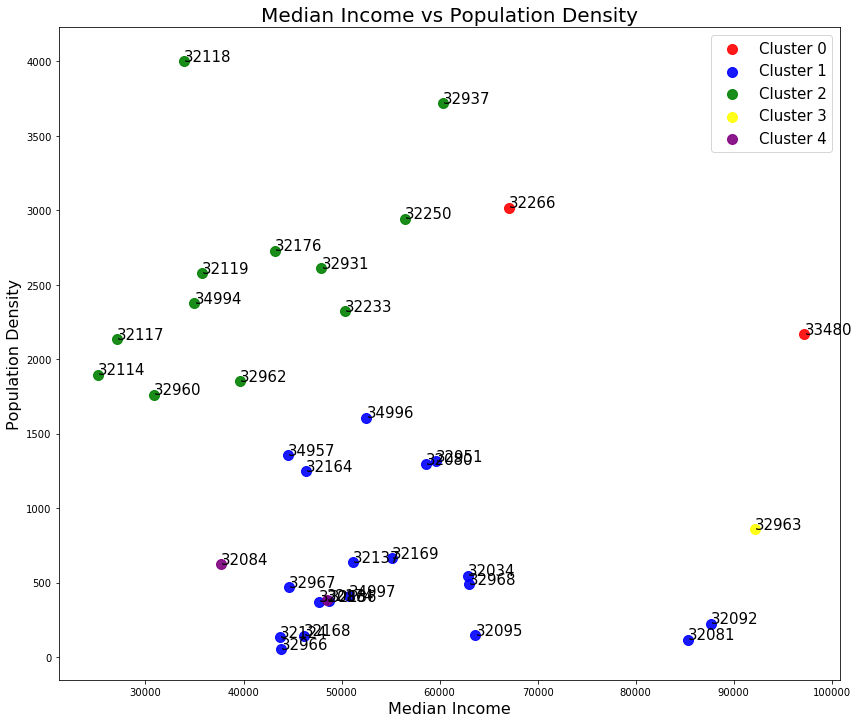

In [26]:
plt.figure(figsize=(14,12))
plt.rcParams['figure.figsize']= (12,12)

for color, label in zip(colors, cluster_labels):
    subset = df4[df4.cluster_ == label]
    for i in subset.index:
            plt.text(subset.loc[i,'Median Income'],\
                    subset.loc[i,'Population Density']+.05,\
                     str(subset.loc[i,'Zipcode']),fontsize=15)
    plt.scatter(subset['Median Income'], subset['Population Density'],\
                s=100,c=color,label='Cluster '+str(label),alpha=0.9)
    
plt.legend(fontsize=15)   
plt.title('Median Income vs Population Density', fontsize=20)
plt.xlabel('Median Income', fontsize=16)
plt.ylabel('Population Density', fontsize=16)

Retrieving the size of each cluster.

In [27]:
df4.groupby(['cluster_'])['cluster_'].count()

cluster_
0     2
1    19
2    12
3     1
4     2
Name: cluster_, dtype: int64

Grouping the clusters to retrieve the mean of each variable of interest for each cluster.

In [28]:
zips_clus = df4.groupby(['cluster_'])['Population','Population Density',\
                                     'Median Income','Median Home Value',\
                                     'Restaurant Total','Mexican Restaurants'].mean()
zips_clus

,Population,Population Density,Median Income,Median Home Value,Restaurant Total,Mexican Restaurants
cluster_,,,,,,
0,8293.000000,2594.500000,82126.5,486800.000000,38.500000,2.000000
1,19668.736842,610.842105,55582.0,210457.894737,55.000000,6.368421
2,21169.000000,2577.916667,40467.0,160525.000000,95.916667,10.750000
3,14911.000000,859.000000,92137.0,489900.000000,100.000000,20.000000
4,38640.500000,504.500000,43107.0,162350.000000,158.500000,24.500000


Extracting just the rows matching the cluster of interest.

In [29]:
df8=df4.loc[df4['cluster_'] == 0]
df8

,City,Zipcode,Population,Population Density,Median Income,Median Home Value,Restaurant Total,Mexican Restaurants,cluster_
4,Neptune Beach,32266,7037.0,3018.0,67045.0,315300.0,29,3,0
25,Playalinda Beach,33480,9549.0,2171.0,97208.0,658300.0,48,1,0


Searching the 32266 area code to retrieve a list of Mexican venues with their Foursquare ID.

In [30]:
S_Bound = df.loc[4,'South Boundry']
W_Bound = df.loc[4,'West Boundry']
N_Bound = df.loc[4,'North Boundry']
E_Bound = df.loc[4,'East Boundry']

url3 = 'https://api.foursquare.com/v2/venues/explore?\
client_id={}&client_secret={}&v={}\
&sw={},{}&ne={},{}\
&intent=browse\
&limit={}\
&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    S_Bound, W_Bound, N_Bound, E_Bound,
    LIMIT, Mex_ID)

zip32266 = requests.get(url3).json()
#zip32266

In [31]:
zip_groups = zip32266['response']['groups']
zip_items = zip_groups[0]['items']
zip_ven_ids=[]
a=0
while a<len(zip_items):
    beta=zip_items[a]
    rest_id=beta['venue']['id']
    zip_ven_ids.append(rest_id)
    a=a+1

zip_ven_ids    

['526a9c0911d2c2e858f27991',
 '4f32501319836c91c7cb6241',
 '4b746e1cf964a52023dc2de3']

In [32]:
len(zip_ven_ids)

3

Extracting the name, rating, url, and pricing tier for each venue within the zip code of interest.

In [35]:
dataframelist = []

a=0
while a<len(zip_ven_ids):
    rest_id=zip_ven_ids[a]
    #print(rest_id)
    url5 = 'https://api.foursquare.com/v2/venues/{}?\
client_id={}&client_secret={}&v={}'.format(rest_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    results5 = requests.get(url5).json()
    rst_details=results5['response']
    name=rst_details['venue']['name']
    try:
        rating = rst_details['venue']['rating']
    except KeyError:
        rating = 'rating not available'
    try:
        rst_url = rst_details['venue']['url']
    except KeyError:
        rst_url = 'url not available'
    try:
        rst_price = rst_details['venue']['price']['tier']
    except KeyError:
        rst_price = 'price not available'
    rst_df_list=[name,rating,rst_url,rst_price]
    dataframelist.append(rst_df_list)
    a=a+1  

In [36]:
df20=pd.DataFrame(dataframelist,columns=['Restaurant Name','Restaurant Rating',\
                                         'Restaurant Website',\
                                        'Restaurant Price'])
df20

,Restaurant Name,Restaurant Rating,Restaurant Website,Restaurant Price
0,Flying Iguana,8.9,http://flyingiguana.com,2
1,Tijuana Flats,rating not available,http://www.tijuanaflats.com,1
2,Atomic Flying Fish Taco Grill,rating not available,url not available,1


Searching the 33480 area code to retrieve a list of Mexican venues within the zip code and their Foursquare ID.

In [37]:
S_Bound = df.loc[25,'South Boundry']
W_Bound = df.loc[25,'West Boundry']
N_Bound = df.loc[25,'North Boundry']
E_Bound = df.loc[25,'East Boundry']

url22 = 'https://api.foursquare.com/v2/venues/explore?\
client_id={}&client_secret={}&v={}\
&sw={},{}&ne={},{}\
&intent=browse\
&limit={}\
&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    S_Bound, W_Bound, N_Bound, E_Bound,
    LIMIT, Mex_ID)

zip33480 = requests.get(url22).json()
zip33480

{'meta': {'code': 200, 'requestId': '5e6edde760ba08001be4bd01'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Palm Beach',
  'headerFullLocation': 'Palm Beach',
  'headerLocationGranularity': 'city',
  'query': 'mexican',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 26.773035, 'lng': -80.027909},
   'sw': {'lat': 26.583994, 'lng': -80.049063}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5b0ef529e7a237002cc42922',
       'name': 'Coyo Taco',
       'location': {'address': '337 Royal Poinciana Way',
        'lat': 26.717155,
        'lng': -80.0428,
        'labeledLatLngs': [{'label': 'display',
          'lat': 26.717155,
     

In [38]:
zip_groups2 = zip33480['response']['groups']
zip_items2 = zip_groups2[0]['items']
zip_ven_ids2=[]
a=0
while a<len(zip_items2):
    beta=zip_items2[a]
    rest_id=beta['venue']['id']
    zip_ven_ids2.append(rest_id)
    a=a+1

zip_ven_ids2 

['5b0ef529e7a237002cc42922']

Extracting the name, rating, url, and pricing tier for each venue within the zip code of interest.

In [39]:
dataframelist2 = []

a=0
while a<len(zip_ven_ids2):
    rest_id=zip_ven_ids2[a]
    #print(rest_id)
    url5 = 'https://api.foursquare.com/v2/venues/{}?\
client_id={}&client_secret={}&v={}'.format(rest_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    results5 = requests.get(url5).json()
    rst_details=results5['response']
    name=rst_details['venue']['name']
    try:
        rating = rst_details['venue']['rating']
    except KeyError:
        rating = 'rating not available'
    try:
        rst_url = rst_details['venue']['url']
    except KeyError:
        rst_url = 'url not available'
    try:
        rst_price = rst_details['venue']['price']['tier']
    except KeyError:
        rst_price = 'price not available'
    rst_df_list=[name,rating,rst_url,rst_price]
    dataframelist2.append(rst_df_list)
    a=a+1

In [40]:
df22=pd.DataFrame(dataframelist2,columns=['Restaurant Name','Restaurant Rating',\
                                         'Restaurant Website',\
                                        'Restaurant Price'])
df22

,Restaurant Name,Restaurant Rating,Restaurant Website,Restaurant Price
0,Coyo Taco,7.9,http://www.coyo-taco.com,1


Python packages to create map with zip code markers with pop ups of zip code data.

In [41]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import CircleMarker

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py37hc8dfbb8_1         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         225 KB

The following NE

Creating map of Florida with markers for zip codes of interest and pop up, with demographic data for the corresponding zip code.

In [43]:
FL_Map=folium.Map(location=[29.120, -80.951], zoom_start=7)
zips=folium.map.FeatureGroup()

for i in range(len(df4)):
    population = str(int(df4.loc[i,'Population']))
    median_income = str(int(df4.loc[i,'Median Income']))
    mex_num = str(int(df4.loc[i,'Mexican Restaurants']))
    label='City: '+df4.loc[i,'City']+'<br>''Zipcode: '\
           +df4.loc[i,'Zipcode']+'<br>''Population: '+population\
           +'<br>''Median Income: '+median_income\
           +'<br>''# of Mex Restaurants: '+mex_num
    zips.add_child(folium.features.CircleMarker\
               ([df3.loc[i,'Latitude'],\
              df.loc[i,'Longitude']],\
                popup=label,\
              radius=3, color='blue',\
              fill_color='red'))
    
FL_Map.add_child(zips)

In [44]:
df4

,City,Zipcode,Population,Population Density,Median Income,Median Home Value,Restaurant Total,Mexican Restaurants,cluster_
0,Atlantic Beach,32233,23673.0,2323.0,50338.0,211100.0,78,9,2
1,Fernandina Beach,32034,31008.0,547.0,62932.0,254400.0,100,15,1
2,Flagler Beach,32136,7080.0,375.0,48767.0,208100.0,45,3,1
3,Jacksonville Beach,32250,25356.0,2944.0,56466.0,247000.0,104,20,2
4,Neptune Beach,32266,7037.0,3018.0,67045.0,315300.0,29,3,0
5,Palm Coast,32137,37821.0,638.0,51153.0,198900.0,93,9,1
6,Palm Coast,32164,41616.0,1248.0,46405.0,157000.0,69,5,1
7,Ponte Vedra,32081,4524.0,118.0,85354.0,326800.0,46,5,1
8,St Augustine,32080,20165.0,1296.0,58648.0,293500.0,48,7,1
9,St Augustine,32084,29729.0,624.0,37670.0,155200.0,133,29,4
